# Apprentissage Automatique : BE 2 

## Premier apprentissage

In [1]:
import numpy as np
import random
# from mnist import MNIST
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
def forwardPass(X, W, b):
    I = X.dot(W)+b
    O = 1/(1+np.exp(-I))
    return (O)

In [3]:
def backwardPass(X, Y, e, W, b, lr):
    new_W = W + (lr*Y*(1-Y)*e) * X.T
    new_b = b + (lr*Y*(1-Y)*e)
    new_e = e*W
    return new_W, new_b, new_e

In [4]:
def printLoss(ii,lLoss,gt,guess):
    if not ii%250:
        lLoss.append(np.square(gt -guess).sum() / 2)
    return lLoss

In [5]:
def sigmoidDiff(Y):
    return Y*(1-Y)

In [6]:
def declareLayer(w,h):
    W = 2 * np.random.random((w,h)) - 1
    b = np.zeros((1, h))
    return W,b

In [7]:
def updateLayer(delta,I,W,b,lr,bFirstLayer):
    new_W = W + lr * I.T.dot(delta)
    b+= lr * delta.sum(axis=0)
    if not bFirstLayer:
        I = lr * delta.dot(W.T)
    return new_W,b,I

In [8]:
def backProgHiddenLayer(sup_delta,sup_W,O):
    error=sup_delta.dot(sup_W.T)
    delta=error*sigmoidDiff(O1)
    return error,delta

In [9]:
def backProgLastLayer(Y,Y_pred):
    error=Y-Y_pred
    delta=error*sigmoidDiff(Y_pred)
    return error,delta

In [10]:
np.random.seed(1) # pour que l'exécution soit déterministe

# N est le nombre de données d'entrée
# D_in est la dimension des données d'entrée
# D_h le nombre de neurones de la couche cachée
# D_out est la dimension de sortie (nombre de neurones de la couche de sortie

N, D_in, D_h, D_out = 30, 2, 10, 3
lr = 0.01 # learning rate


In [12]:
np.random.seed(1)
lLoss=[]

X = np.random.random((N, D_in))
Y = np.random.random((N, D_out))


'''Initialisation aléatoire des poids du réseau'''
W1,b1=declareLayer(D_in,D_h)
W2,b2=declareLayer(D_h,D_out)

''' Learning '''

for ii in tqdm(range(100000),desc='Learning...'):
    pass
    '''Forward '''
    O1 = forwardPass(X,W1,b1)
    O2 = forwardPass(O1,W2,b2)
    Y_pred = O2
    
    lLoss=printLoss(ii,lLoss,Y,Y_pred)

    ''' Backprog ''' 
    l2_error,l2_delta=backProgLastLayer(Y,Y_pred)
    l1_error,l1_delta=backProgHiddenLayer(l2_delta,W2,O1)

    W2,b2,O1=updateLayer(l2_delta,O1,W2,b2,lr,bFirstLayer=False)
    W1,b1,X=updateLayer(l1_delta,X,W1,b1,lr,bFirstLayer=True)
    
print('Done !')

print("Results : ")

Learning...: 100%|██████████| 100000/100000 [00:05<00:00, 17232.30it/s]

Done !
Results : 
[4.668071349518289, 4.161800869302836, 4.05948827147756, 3.9782055806013092, 3.912549221186062, 3.859230103990488, 3.815762380899192, 3.7801706872526046, 3.75096458262496, 3.7270707521108384, 3.7076899777891024, 3.692152489362202, 3.6798314498816254, 3.670122330071677, 3.6624616125332037, 3.6563540012556097, 3.6513898172208132, 3.647248003973922, 3.6436880435540977, 3.640536203218879, 3.637670557164377, 3.6350074127836463, 3.6324902390725033, 3.6300812379099794, 3.627755232151887, 3.625495390869838, 3.6232903217188994, 3.6211321368208558, 3.6190151896916674, 3.616935263188762, 3.614889054451912, 3.612873852056886, 3.6108873356890236, 3.6089274528323796, 3.6069923432310653, 3.605080292593407, 3.603189703951513, 3.6013190795224035, 3.5994670087121077, 3.5976321596456, 3.5958132726780305, 3.594009154995668, 3.5922186758074908, 3.5904407618609895, 3.5886743931510665, 3.58691859876786, 3.5851724528713884, 3.583435070802731, 3.5817056053514627, 3.5799832432024945, 3.5782672

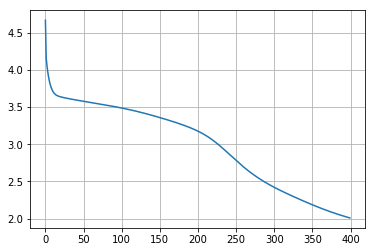

In [16]:
plt.figure()
plt.plot(lLoss)
plt.grid(True)
plt.show()

## MNIST



### Loading data

In [17]:
from mnist import MNIST
mdata = MNIST('MNIST-data')
DataApp, LabelApp = mdata.load_training()
DataTest, LabelTest = mdata.load_testing()

In [18]:
DataApp=np.asarray(DataApp)
LabelApp=np.asarray(LabelApp)
DataTest=np.asarray(DataTest)
LabelTest=np.asarray(LabelTest)

In [19]:
DataApp.shape

(60000, 784)

In [20]:
def decoupage_donnees(dataApp,labelApp,ratio):
    nr=int(ratio*dataApp.shape[0])
    l=list(range(dataApp.shape[0]))
    np.random.shuffle(l)

    dataLearning=np.asarray([dataApp[l[ii]] for ii in range(nr)])
    labelLearning=np.asarray([labelApp[l[ii]] for ii in range(nr)])
    dataEval=np.asarray([dataApp[l[ii+nr]] for ii in range(dataApp.shape[0]-nr)])
    labelEval=np.asarray([labelApp[l[ii+nr]] for ii in range(dataApp.shape[0]-nr)])
    return dataLearning,labelLearning,dataEval,labelEval

In [21]:
dataLearning,labelLearning,dataEval,labelEval=decoupage_donnees(DataApp,
                                                                LabelApp,
                                                                0.99)


In [22]:
dataEval.shape[0]

600

### Launching learning

In [23]:
# N est le nombre de données d'entrée
# D_in est la dimension des données d'entrée
# D_h le nombre de neurones de la couche cachée
# D_out est la dimension de sortie (nombre de neurones de la couche de sortie

N=dataEval.shape[0]
D_in=dataEval.shape[1]
D_h=1000
D_out=10
lr = 0.01 

In [24]:
def makeGT(x):
    z=np.zeros(10)
    z[x]=1
    return z

labelEval2=np.asarray(list(map(lambda x : makeGT(x) ,labelEval.tolist()))[0])

In [ ]:
np.random.seed(1)
lLoss=[]

X = np.random.random((N, D_in))
Y = np.random.random((N, D_out))


'''Initialisation aléatoire des poids du réseau'''
W1,b1=declareLayer(D_in,D_h)
W2,b2=declareLayer(D_h,D_out)

''' Learning '''

for ii in tqdm(range(1000)):
    
    '''Forward '''
    O1 = forwardPass(X,W1,b1)
    O2 = forwardPass(O1,W2,b2)
    Y_pred = O2
    
    #labelFound=np.asarray(list(map(lambda x : x.argmax(axis=0),Y_pred)))
    lLoss=printLoss(ii,lLoss,labelEval2,Y_pred)

    ''' Backprog ''' 
    l2_error,l2_delta=backProgLastLayer(labelEval2,Y_pred)
    l1_error,l1_delta=backProgHiddenLayer(l2_delta,W2,O1)

    W2,b2,O1=updateLayer(l2_delta,O1,W2,b2,lr,bFirstLayer=False)
    W1,b1,X=updateLayer(l1_delta,X,W1,b1,lr,bFirstLayer=True)
    
print('Done !')

print("Results : ")
print(lLoss)

 37%|███▋      | 368/1000 [00:45<01:17,  8.16it/s]